In [1]:
#imports of libraries of both webscraping billboards hot100 and spotify api
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

In [15]:
# spotify api
#Initialize SpotiPy with user credentials
from config import client_id, client_secret
import spotipy
import pandas as pd
import json
import pprint
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [3]:
# billboard hot 100
url = 'https://www.billboard.com/charts/hot-100/'
response = requests.get(url)
soup = BeautifulSoup(response.content)

In [4]:
from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [9]:
#soup.select("h3.a-no-trucate")[0].get_text(strip=True) get first title
#soup.select("span.c-label.a-no-trucate")[0].get_text(strip=True) get first author

#hot100_dict = {"title": [], "author": []}
title_list = []
artist_list = []
for i in range(99):
    title_list.append(soup.select("h3.a-no-trucate")[i].get_text(strip=True))
    artist_list.append(soup.select("span.c-label.a-no-trucate")[i].get_text(strip=True))

#title_list, author_list check to works: works

In [10]:
bb_df = pd.DataFrame({'title': title_list, 'artist': artist_list})
bb_df

,title,artist
0,A Bar Song (Tipsy),Shaboozey
1,Die With A Smile,Lady Gaga & Bruno Mars
2,Birds Of A Feather,Billie Eilish
3,Espresso,Sabrina Carpenter
4,Lose Control,Teddy Swims
...,...,...
94,Thick Of It,KSI Featuring Trippie Redd
95,Prove It,21 Savage & Summer Walker
96,4x4xU,Lainey Wilson
97,I Ain't Sayin',Jordan Davis


In [13]:
bb_df.to_csv('bbhot100.csv', index=False)

In [ ]:
# old bb hot 100 search and random output code
# it was updated because displaying the song already fetched the spotify json api info at that time,
# making the various verification steps to ensure the song is correctly picked redundant

from difflib import SequenceMatcher
import numpy as np
threshold_song = 0.7
threshold_artist = 0.5

song_entered = input('Please enter your favourite song and artist like this example: "mensch","herbert groenemeyer"')
# Correct usage with split and strip
song_artist_input = [item.strip().strip('"').lower() for item in song_entered.split(',')]

spotify_search = sp.search(q=song_artist_input, limit=10)
for song in range(10):
    input_id = spotify_search['tracks']['items'][song_artist]['id'])
    display(play_song(input_id))
    input_song_name = spotify_search['tracks']['items'][song_artist]['name']
    if input('Did you mean this song? Type in y for yes or n for no.') in ['y','yes']:
        break
    else:
        continue

match_found = False
for title in bb_df['title']:
    similarity = SequenceMatcher(None, song_artist_input[0], title.lower()).ratio()
    if similarity >= threshold_song:
        for artist in bb_df['artist']:
            similarity = SequenceMatcher(None, song_artist_input[1], artist.lower()).ratio()
            if similarity >= threshold_author:
                if input(f'Match found: {title} by {artist}. Did you mean this song? Type y for yes or n for no.') == "y":
                    # Get random row and column indices
                    random_row = np.random.randint(0, bb_df.shape[0])
                    random_title = bb_df.iloc[random_row, 0]
                    random_artist = bb_df.iloc[random_row, 1]
                    print(f'Your randomly selected song: {random_title} by {random_artist}')
                    match_found = True
                    break
        if match_found:
            break
else:
    print("No match found")

In [17]:
# current start of code (except library imports and bbhot100 fetching)
song_entered = input('Please enter your favourite song and artist like this example: "mensch","herbert groenemeyer":')
# Correct usage with split and strip
song_artist_input = [item.strip().strip('"').lower() for item in song_entered.split(',')]

spotify_search = sp.search(q=song_artist_input, limit=10)
for song in range(10):
    input_id = spotify_search['tracks']['items'][song]['id']
    display(play_song(input_id))
    input_song_name = spotify_search['tracks']['items'][song]['name']
    print(input_song_name)
    if input('Did you mean this song? Type in y for yes or n for no.') in ['y','yes']:
        break
    else:
        continue

if input_song_name in bb_df['title'].values:
    # Get random row and column indices
    random_row = np.random.randint(0, bb_df.shape[0])
    random_title = bb_df.iloc[random_row, 0]
    random_artist = bb_df.iloc[random_row, 1]
    spotify_search2 = sp.search(q=random_title + ' ' + random_artist, limit=1)
    hot_rec_id = spotify_search2['tracks']['items'][0]['id']
    display(play_song(hot_rec_id))
    print(f'Your song is currently sizzling hot, so here is another hot song: {random_title} by {random_artist}')
else:
    print("Your song is not in the Billboard Top 100, but of course this doesnt mean anything. Here is a recommendation for you:")

# go on with finding the audio features of the song

Please enter your favourite song and artist like this example: "mensch","herbert groenemeyer": mensch gröne


Mensch


Did you mean this song? Type in y for yes or n for no. y


Your song is not in the Billboard Top 100, but of course this doesnt mean anything. Here is a recommendation for you:


In [12]:
#idea: iterate over spotify genres for 
#len(sp.recommendation_genre_seeds()['genres']) #126 genres in spotify
#sp.recommendation_genre_seeds()['genres']
sp.recommendation_genre_seeds()
#126 genres: 30 songs per genre in the final dictionary = 3780 songs

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


In [11]:
import time
import json
import os
import random

songs_data_file = "songs_data.json"
completed_genres_file = "completed_genres.json"

# Load checkpoints if they exist
if os.path.exists(songs_data_file):
    with open(songs_data_file, "r") as f:
        songs_data = json.load(f)
else:
    songs_data = {}

if os.path.exists(completed_genres_file):
    with open(completed_genres_file, "r") as f:
        completed_genres = set(json.load(f))
else:
    completed_genres = set()

# Fetch available genres
available_genres = sp.recommendation_genre_seeds()['genres']

# Skip already completed genres
remaining_genres = [genre for genre in available_genres if genre not in completed_genres]
print(f"Genres to process: {remaining_genres}")

# Target: Collect songs for each genre
for genre in remaining_genres:
    print(f"\nStarting collection for genre: {genre}")
    genre_songs = set()  # Track unique songs for this genre

    try:
        # Single API call: Fetch up to 50 tracks
        recommendation_results = sp.recommendations(seed_genres=[genre], limit=42)

        # Sort tracks by popularity
        sorted_tracks = sorted(recommendation_results['tracks'], key=lambda x: x['popularity'], reverse=True)
        
        # Top 15 most popular songs
        popular_tracks = sorted_tracks[:15]

        # Remaining tracks (not in the top 15)
        remaining_tracks = sorted_tracks[15:]

        # Randomly sample 15 tracks from the remaining songs
        random_tracks = random.sample(remaining_tracks, min(15, len(remaining_tracks)))

        # Add the popular tracks to the dataset
        for track in popular_tracks:
            song_id = track['id']
            if song_id not in songs_data:
                songs_data[song_id] = {
                    'id': song_id,
                    'name': track['name'],
                    'artist': [artist['name'] for artist in track['artists']],
                    'genre': genre,
                    'popularity': track['popularity']
                }
                genre_songs.add(song_id)

        # Add the random tracks to the dataset
        for track in random_tracks:
            song_id = track['id']
            if song_id not in songs_data:
                songs_data[song_id] = {
                    'id': song_id,
                    'name': track['name'],
                    'artist': [artist['name'] for artist in track['artists']],
                    'genre': genre,
                    'popularity': track['popularity']
                }
                genre_songs.add(song_id)

    except Exception as e:
        print(f"Error fetching tracks for genre '{genre}': {e}")

    print(f"Finished collecting for genre '{genre}': {len(genre_songs)} songs collected.")

    # Save progress to checkpoint files
    completed_genres.add(genre)
    with open(songs_data_file, "w") as f:
        json.dump(songs_data, f)
    with open(completed_genres_file, "w") as f:
        json.dump(list(completed_genres), f)

    # Rate limiting
    time.sleep(5)

print(f"\nTotal unique songs collected: {len(songs_data)}")

KeyboardInterrupt: 

In [49]:
songs_df = pd.read_json('songs_data.json', orient='index')
songs_df = songs_df.reset_index(drop=True)
songs_df

,id,name,artist,genre,popularity
0,4JjPLqECP5E48MXcEc2wzA,Tainted Love,"[Stella Starlight Trio, Karen Souza]",acoustic,35
1,2ihCaVdNZmnHZWt0fvAM7B,Little Talks,[Of Monsters and Men],acoustic,77
2,37928J06bQreiIuhZvRlWQ,When the Lights Die,[Boyce Avenue],acoustic,15
3,6ERQqdIkr7Rp4tt52Eep6r,The Look Of Love,[Diana Krall],acoustic,0
4,6WVtfUA8r0iYmQotCRVp2J,Bette Davis Eyes,[Jazzystics feat. Karen Souza],acoustic,0
...,...,...,...,...,...
3558,7tKHQy1vQGRHL9mIt5biX3,Im Tachpetza (If Thou Wisheth),[Idan Raichel],world-music,0
3559,6ooW7AxiD8FRyIBwVFKC6X,El Son te Llama,[Orchestra Baobab],world-music,0
3560,1qetiiwkJuzkL91TnzBJ9R,La drogue,[Ali Farka Touré],world-music,0
3561,7FIKMHuZDDlAx0j8wccvFj,Gomni,"[Ali Farka Touré, Toumani Diabaté]",world-music,0


In [16]:
songs_df[songs_df['popularity'] > 80]

,id,name,artist,genre,popularity
11,3U4isOIWM3VvDubwSI3y7a,All of Me,[John Legend],acoustic,83
359,6nek1Nin9q48AVZcWs9e9D,Paradise,[Coldplay],british,81
448,1gihuPhrLraKYrJMAEONyc,Feel So Close - Radio Edit,[Calvin Harris],children,82
478,0I3q5fE6wg7LIfHGngUTnV,Ms. Jackson,[Outkast],chill,81
479,0BCPKOYdS2jbQ8iyB56Zns,Clocks,[Coldplay],chill,81
777,5rb9QrpfcKFHM1EUbSIurX,Yeah! (feat. Lil Jon & Ludacris),"[USHER, Lil Jon, Ludacris]",disco,84
778,55h7vJchibLdUkxdlX3fK7,Treasure,[Bruno Mars],disco,82
999,5xEM5hIgJ1jjgcEBfpkt2F,Complicated,[Avril Lavigne],emo,81
1378,2374M0fQpWi3dLnB54qaLX,Africa,[TOTO],happy,83
1520,6gBFPUFcJLzWGx4lenP6h2,goosebumps,[Travis Scott],hip-hop,85


In [57]:
list_of_songs_id = songs_df['id'].to_list()
print(len(list_of_songs_id))
list_of_songs_id

3563


['4JjPLqECP5E48MXcEc2wzA',
 '2ihCaVdNZmnHZWt0fvAM7B',
 '37928J06bQreiIuhZvRlWQ',
 '6ERQqdIkr7Rp4tt52Eep6r',
 '6WVtfUA8r0iYmQotCRVp2J',
 '70zapGEw5KQiHBhjNcGjzo',
 '76aadnUFFANRNDs6L3aqxw',
 '6J7cSyvSCnPwv3vqHchEfL',
 '7iBSkXB0pTvZasOLf0Qxk9',
 '2nGFzvICaeEWjIrBrL2RAx',
 '2BBb3UMJBNlofpC25pbSp4',
 '3U4isOIWM3VvDubwSI3y7a',
 '7bcP9k51f1VNCaFUyZ3P5M',
 '6Vc5wAMmXdKIAM7WUoEb7N',
 '0SuG9kyzGRpDqrCWtgD6Lq',
 '3GKZKaNY0Stt4swaxz83E5',
 '33e9HtOfO1ye1h8xQ7Foc9',
 '4eiWWDbWczW2GLqg6Lyg48',
 '2yBAPa9HZj3P2szSaaj4k1',
 '6qTmjG7thRJEOaUKFmfjGR',
 '6N001s7hglDhXJyjeXeg4F',
 '4vojpVoYaj4myAkIcfNKIN',
 '08kTO4EW0jb07zNsCNM83w',
 '3LHg768dEKqJKht2uPTlVR',
 '2Gb3up6s243JSVuRRjwQoF',
 '5jclmAX2XQp5G3b6K30UJl',
 '1xcxzCeF86LD3mFh36Ou4S',
 '6wZI4mdT8JwXgkGURnBQiq',
 '6rzWV1cY3OQLR4as5NcTEd',
 '7bcHBD27hxkK5aSXjWOysM',
 '1mDZpgKx9Xpg6ijl9DvdA6',
 '4Xjtbdoc3Y5V4O4hM9bUsF',
 '7ha7zYOryB0rpnMTa4S75U',
 '7sWqtUHJqs6T9926ygd52v',
 '1rVyxy6CRo3dB5z5oNKZfc',
 '68RV0HNYnbkrztSe9sBZ1W',
 '37BTh5g05cxBIRYMbw8g2T',
 

In [59]:
chunk_size = 100
#Here comes the code that chops the large list into smaller lists of 100 ids each
songs_ids_chopped = [list_of_songs_id[i:i+chunk_size] for i in range(0,len(list_of_songs_id), 100)]
len(songs_ids_chopped)

36

In [61]:
af_list = []
for i in songs_ids_chopped:
    af_list.extend(sp.audio_features(i))
afeatures_df = pd.DataFrame(af_list)
afeatures_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.635,0.239,4,-13.924,0,0.0434,0.1920,0.000000,0.1300,0.0724,62.466,audio_features,4JjPLqECP5E48MXcEc2wzA,spotify:track:4JjPLqECP5E48MXcEc2wzA,https://api.spotify.com/v1/tracks/4JjPLqECP5E4...,https://api.spotify.com/v1/audio-analysis/4JjP...,193840,4
1,0.457,0.757,1,-5.177,1,0.0320,0.0206,0.000000,0.1460,0.4170,102.961,audio_features,2ihCaVdNZmnHZWt0fvAM7B,spotify:track:2ihCaVdNZmnHZWt0fvAM7B,https://api.spotify.com/v1/tracks/2ihCaVdNZmnH...,https://api.spotify.com/v1/audio-analysis/2ihC...,266600,4
2,0.412,0.749,2,-4.657,1,0.0404,0.0286,0.000000,0.0726,0.2640,136.019,audio_features,37928J06bQreiIuhZvRlWQ,spotify:track:37928J06bQreiIuhZvRlWQ,https://api.spotify.com/v1/tracks/37928J06bQre...,https://api.spotify.com/v1/audio-analysis/3792...,263867,4
3,0.585,0.266,10,-14.692,1,0.0271,0.6490,0.005540,0.0903,0.3660,93.009,audio_features,6ERQqdIkr7Rp4tt52Eep6r,spotify:track:6ERQqdIkr7Rp4tt52Eep6r,https://api.spotify.com/v1/tracks/6ERQqdIkr7Rp...,https://api.spotify.com/v1/audio-analysis/6ERQ...,281093,4
4,0.741,0.319,0,-9.245,1,0.0296,0.2470,0.000000,0.1050,0.1770,100.006,audio_features,6WVtfUA8r0iYmQotCRVp2J,spotify:track:6WVtfUA8r0iYmQotCRVp2J,https://api.spotify.com/v1/tracks/6WVtfUA8r0iY...,https://api.spotify.com/v1/audio-analysis/6WVt...,238627,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.207,0.834,6,-5.566,0,0.1230,0.8040,0.023200,0.1130,0.4030,80.037,audio_features,7tKHQy1vQGRHL9mIt5biX3,spotify:track:7tKHQy1vQGRHL9mIt5biX3,https://api.spotify.com/v1/tracks/7tKHQy1vQGRH...,https://api.spotify.com/v1/audio-analysis/7tKH...,238293,4
3559,0.551,0.810,2,-8.093,0,0.0427,0.5130,0.000023,0.0888,0.9380,156.642,audio_features,6ooW7AxiD8FRyIBwVFKC6X,spotify:track:6ooW7AxiD8FRyIBwVFKC6X,https://api.spotify.com/v1/tracks/6ooW7AxiD8FR...,https://api.spotify.com/v1/audio-analysis/6ooW...,325627,4
3560,0.712,0.444,9,-11.533,1,0.0365,0.6600,0.000926,0.0834,0.6260,118.548,audio_features,1qetiiwkJuzkL91TnzBJ9R,spotify:track:1qetiiwkJuzkL91TnzBJ9R,https://api.spotify.com/v1/tracks/1qetiiwkJuzk...,https://api.spotify.com/v1/audio-analysis/1qet...,336187,3
3561,0.591,0.422,7,-13.389,0,0.0409,0.6180,0.952000,0.2180,0.6730,81.002,audio_features,7FIKMHuZDDlAx0j8wccvFj,spotify:track:7FIKMHuZDDlAx0j8wccvFj,https://api.spotify.com/v1/tracks/7FIKMHuZDDlA...,https://api.spotify.com/v1/audio-analysis/7FIK...,254027,4


In [62]:
afeatures_df['id'].value_counts() # no duplicates

id
4JjPLqECP5E48MXcEc2wzA    1
2LiMbz4TXnxq2zVkMfDHAz    1
2jzlBSKI8GLq3pxlXLMwG6    1
3NBqqhwCfpg4kl2huq0LuH    1
5mwv60DUr15t4IhDX6FDyV    1
                         ..
6wWyLpO8HbBYpKJR8C7Kml    1
425JS2NA2ZeAVTAUDfwhcg    1
6TGRZBZdDVimF8tmKrvTzI    1
3QDdUv3PNaES1pyoMScELy    1
6O3cgvwRrl0Nv48diMuelA    1
Name: count, Length: 3563, dtype: int64

In [24]:
energy_set = {
    afeatures_df.loc[afeatures_df['energy'] == song_energy, 'id'].iloc[0]
    for song_energy in afeatures_df['energy']
    if song_energy > 0.99
}
energy_list = list(energy_set)
len(energy_list)

10

In [25]:
for i in energy_list:
    print(songs_df[songs_df['id'] == i])

                          id         name            artist      genre  \
1264  33NLxS6mNVRf1GgezVIQMp  Dead Inside  [Insect Warfare]  grindcore   

      popularity  
1264          21  
                         id   name       artist        genre  popularity
690  4PHppm7v48ys7YrVelKSYq  ObZen  [Meshuggah]  death-metal          43
                         id             name           artist  genre  \
174  4gJrYv7pMjwvYeVxxVtOqg  KIRA-KIRAしましょう?  [秋月マキシ(CV:芹澤優)]  anime   

     popularity  
174           1  
                         id     name   artist  genre  popularity
157  4xvfH6Gl07mbwK0lCjt8lD  ミライノナマエ  [i☆Ris]  anime           7
                         id               name        artist        genre  \
205  65ctx4YGWEn3QDYrxSSAoo  Across the Vacuum  [Darkthrone]  black-metal   

     popularity  
205           0  
                         id      name               artist        genre  \
105  2aCsRmHTuWPL7WnL5uSijc  Miss You  [Foster The People]  alternative   

     popularit

In [27]:
afeatures_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.635,0.239,4,-13.924,0,0.0434,0.1920,0.000000,0.1300,0.0724,62.466,audio_features,4JjPLqECP5E48MXcEc2wzA,spotify:track:4JjPLqECP5E48MXcEc2wzA,https://api.spotify.com/v1/tracks/4JjPLqECP5E4...,https://api.spotify.com/v1/audio-analysis/4JjP...,193840,4
1,0.457,0.757,1,-5.177,1,0.0320,0.0206,0.000000,0.1460,0.4170,102.961,audio_features,2ihCaVdNZmnHZWt0fvAM7B,spotify:track:2ihCaVdNZmnHZWt0fvAM7B,https://api.spotify.com/v1/tracks/2ihCaVdNZmnH...,https://api.spotify.com/v1/audio-analysis/2ihC...,266600,4
2,0.412,0.749,2,-4.657,1,0.0404,0.0286,0.000000,0.0726,0.2640,136.019,audio_features,37928J06bQreiIuhZvRlWQ,spotify:track:37928J06bQreiIuhZvRlWQ,https://api.spotify.com/v1/tracks/37928J06bQre...,https://api.spotify.com/v1/audio-analysis/3792...,263867,4
3,0.585,0.266,10,-14.692,1,0.0271,0.6490,0.005540,0.0903,0.3660,93.009,audio_features,6ERQqdIkr7Rp4tt52Eep6r,spotify:track:6ERQqdIkr7Rp4tt52Eep6r,https://api.spotify.com/v1/tracks/6ERQqdIkr7Rp...,https://api.spotify.com/v1/audio-analysis/6ERQ...,281093,4
4,0.741,0.319,0,-9.245,1,0.0296,0.2470,0.000000,0.1050,0.1770,100.006,audio_features,6WVtfUA8r0iYmQotCRVp2J,spotify:track:6WVtfUA8r0iYmQotCRVp2J,https://api.spotify.com/v1/tracks/6WVtfUA8r0iY...,https://api.spotify.com/v1/audio-analysis/6WVt...,238627,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.207,0.834,6,-5.566,0,0.1230,0.8040,0.023200,0.1130,0.4030,80.037,audio_features,7tKHQy1vQGRHL9mIt5biX3,spotify:track:7tKHQy1vQGRHL9mIt5biX3,https://api.spotify.com/v1/tracks/7tKHQy1vQGRH...,https://api.spotify.com/v1/audio-analysis/7tKH...,238293,4
3559,0.551,0.810,2,-8.093,0,0.0427,0.5130,0.000023,0.0888,0.9380,156.642,audio_features,6ooW7AxiD8FRyIBwVFKC6X,spotify:track:6ooW7AxiD8FRyIBwVFKC6X,https://api.spotify.com/v1/tracks/6ooW7AxiD8FR...,https://api.spotify.com/v1/audio-analysis/6ooW...,325627,4
3560,0.712,0.444,9,-11.533,1,0.0365,0.6600,0.000926,0.0834,0.6260,118.548,audio_features,1qetiiwkJuzkL91TnzBJ9R,spotify:track:1qetiiwkJuzkL91TnzBJ9R,https://api.spotify.com/v1/tracks/1qetiiwkJuzk...,https://api.spotify.com/v1/audio-analysis/1qet...,336187,3
3561,0.591,0.422,7,-13.389,0,0.0409,0.6180,0.952000,0.2180,0.6730,81.002,audio_features,7FIKMHuZDDlAx0j8wccvFj,spotify:track:7FIKMHuZDDlAx0j8wccvFj,https://api.spotify.com/v1/tracks/7FIKMHuZDDlA...,https://api.spotify.com/v1/audio-analysis/7FIK...,254027,4


### Modelling: KMeans

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [66]:
afeatures_feature_df=afeatures_df[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]

In [69]:
scaler = StandardScaler()
scaler.fit(afeatures_feature_df)
X_scaled = scaler.transform(afeatures_feature_df)
X_scaled_df = pd.DataFrame(X_scaled, columns = afeatures_feature_df.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.463065,-1.721144,-1.248862,-0.366896,-0.254916,-0.537665,-0.417416,-1.560629,-2.130837
1,-0.553430,0.358076,0.621666,-0.474412,-0.786404,-0.537665,-0.325175,-0.259969,-0.710572
2,-0.810409,0.325965,0.732867,-0.395189,-0.761597,-0.537665,-0.748332,-0.837453,0.448858
3,0.177533,-1.612767,-1.413097,-0.520625,1.162179,-0.519940,-0.646290,-0.452464,-1.059614
4,1.068394,-1.400029,-0.248267,-0.497047,-0.084368,-0.537665,-0.561543,-1.165826,-0.814211


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

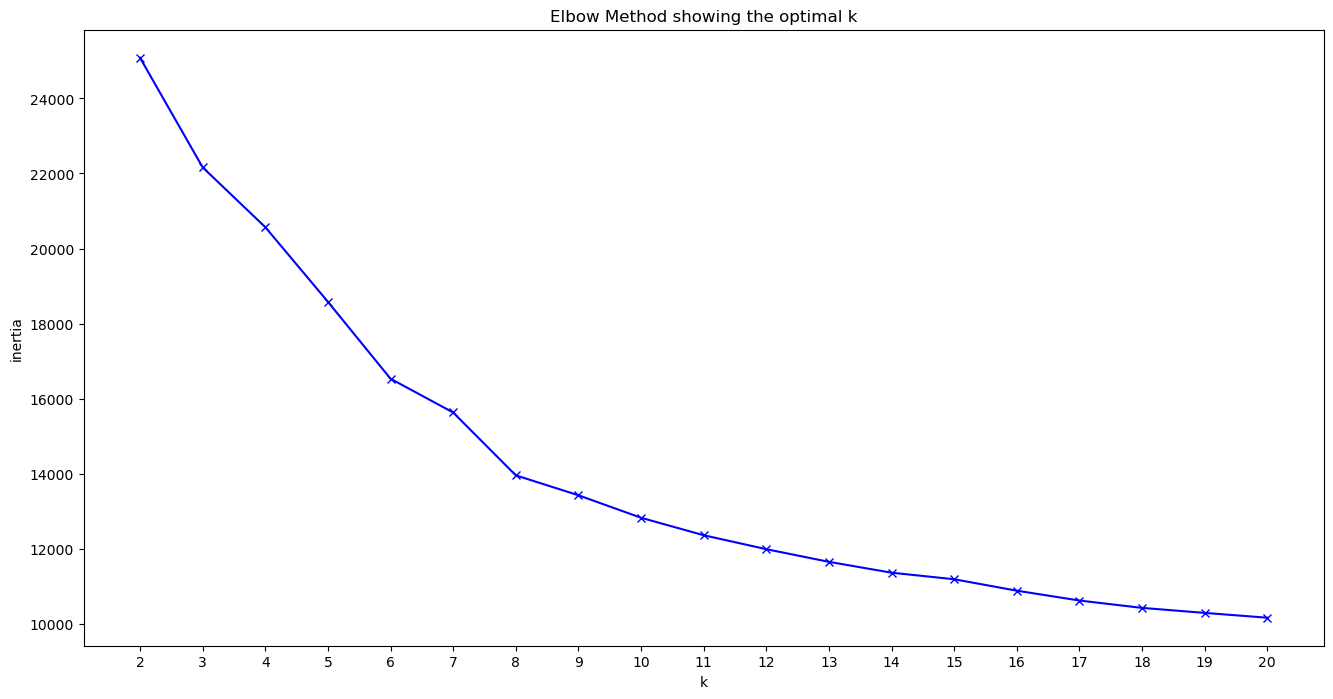

In [71]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# 8 looks good, also maybe 6 or 3

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

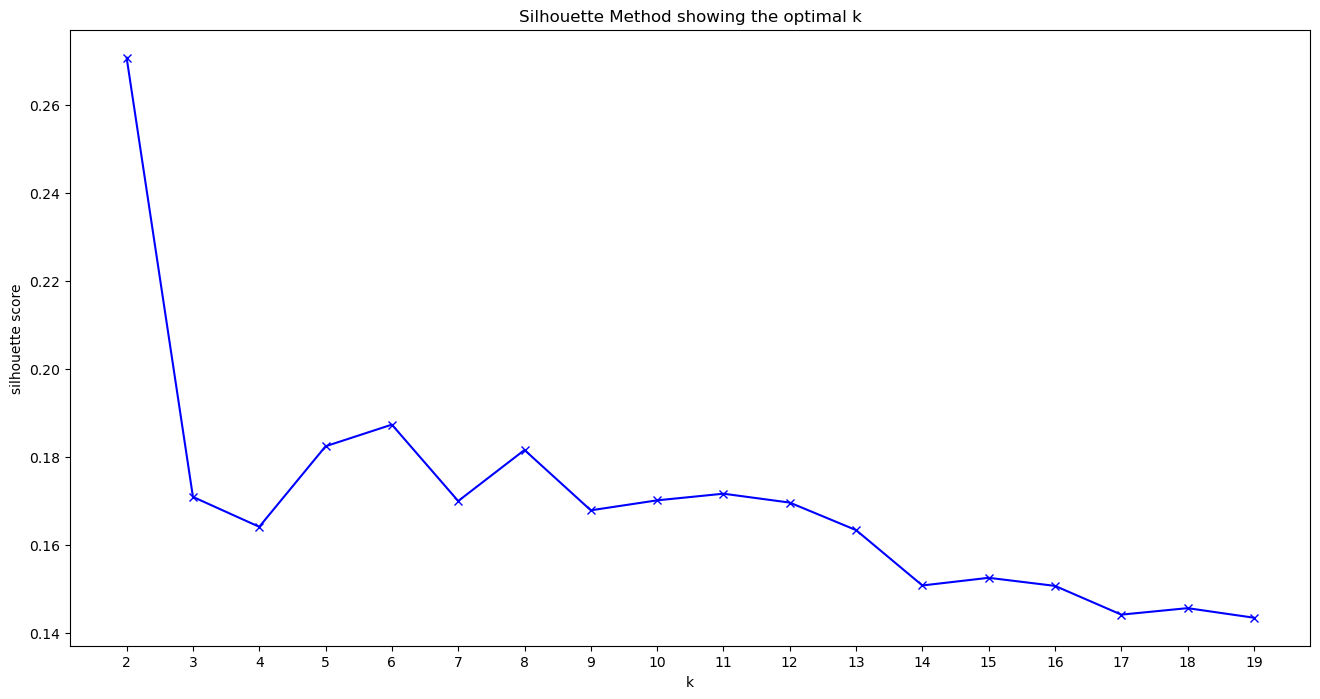

In [73]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    #filename = "Model/kmeans_" + str(k) + ".pickle"
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
# silhouette score is best at 2,6,8

# --> take 8, because i want to have different recommendations!

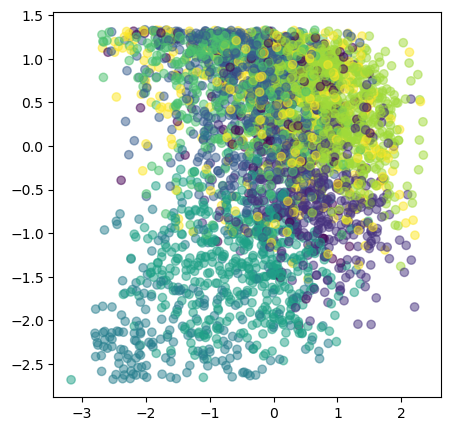

In [75]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=8)
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

plt.figure(figsize=(5, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=pred,alpha=0.5)
plt.show()

In [101]:
# add clusters to audiofeatures df and export to csv so that it can be used for picking a random song:
afeatures_df['cluster'] = kmeans.labels_

afeatures_df.to_csv('afeatures_with_clusters.csv', index=False)

In [79]:
# Save the scaler and KMeans model
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('kmeans_8_cluster.pkl', 'wb') as kmeans_file:
    pickle.dump(kmeans, kmeans_file)

In [66]:
# ask user song input:
song_entered = input('Please enter your favourite song and artist like this example: "mensch","herbert groenemeyer"')
# Correct usage with split and strip
song_artist_input = [item.strip().strip('"').lower() for item in song_entered.split(',')]

Please enter your favourite song and artist like this example: "mensch","herbert groenemeyer" "billionaire","bruno mars"


In [87]:
id = spotify_search['tracks']['items'][song_artist]['id']
af=pd.DataFrame(sp.audio_features(id))
af_relevant=af[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo"]]
af_relevant

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.701,0.76,-5.478,0.0285,0.107,0.000065,0.185,0.69,103.969


In [91]:
# Load the scaler and KMeans model
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

with open('kmeans_8_cluster.pkl', 'rb') as kmeans_file:
    loaded_kmeans = pickle.load(kmeans_file)

af_scaled = loaded_scaler.transform(af_relevant)
af_scaled

array([[ 0.8399681 ,  0.37011799,  0.55729818, -0.50742108, -0.51848917,
        -0.53745598, -0.10033673,  0.77044374, -0.67521866]])

In [105]:
cluster_predicted = loaded_kmeans.predict(af_scaled)
cluster_predicted

array([6], dtype=int32)

In [111]:
cluster_filtered = afeatures_df[afeatures_df['cluster'] == int(cluster_predicted)]
cluster_filtered

/var/folders/72/b7zxktp96cz1n4tjk3mlbj5w0000gn/T/ipykernel_1385/2176258336.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cluster_filtered = afeatures_df[afeatures_df['cluster'] == int(cluster_predicted)]


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
17,0.930,0.854,6,-6.138,1,0.2280,0.49600,0.000052,0.0675,0.767,128.087,audio_features,4eiWWDbWczW2GLqg6Lyg48,spotify:track:4eiWWDbWczW2GLqg6Lyg48,https://api.spotify.com/v1/tracks/4eiWWDbWczW2...,https://api.spotify.com/v1/audio-analysis/4eiW...,130500,4,6
24,0.721,0.698,10,-4.469,1,0.0328,0.19300,0.000000,0.0713,0.369,106.020,audio_features,2Gb3up6s243JSVuRRjwQoF,spotify:track:2Gb3up6s243JSVuRRjwQoF,https://api.spotify.com/v1/tracks/2Gb3up6s243J...,https://api.spotify.com/v1/audio-analysis/2Gb3...,218018,4,6
34,0.747,0.780,9,-10.149,0,0.0398,0.23000,0.000000,0.1100,0.915,109.991,audio_features,1rVyxy6CRo3dB5z5oNKZfc,spotify:track:1rVyxy6CRo3dB5z5oNKZfc,https://api.spotify.com/v1/tracks/1rVyxy6CRo3d...,https://api.spotify.com/v1/audio-analysis/1rVy...,283220,4,6
35,0.737,0.910,5,-5.135,1,0.0683,0.02260,0.001040,0.0987,0.650,105.925,audio_features,68RV0HNYnbkrztSe9sBZ1W,spotify:track:68RV0HNYnbkrztSe9sBZ1W,https://api.spotify.com/v1/tracks/68RV0HNYnbkr...,https://api.spotify.com/v1/audio-analysis/68RV...,205733,4,6
37,0.728,0.900,5,-3.500,1,0.0394,0.00211,0.017500,0.1290,0.838,125.000,audio_features,6i2YA4WM3FqwyO7UX7XWbx,spotify:track:6i2YA4WM3FqwyO7UX7XWbx,https://api.spotify.com/v1/tracks/6i2YA4WM3Fqw...,https://api.spotify.com/v1/audio-analysis/6i2Y...,263973,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.710,0.878,4,-6.499,0,0.0461,0.02780,0.000010,0.0342,0.924,90.992,audio_features,6IkUUrN8CqZ8op1zb6mVKY,spotify:track:6IkUUrN8CqZ8op1zb6mVKY,https://api.spotify.com/v1/tracks/6IkUUrN8CqZ8...,https://api.spotify.com/v1/audio-analysis/6IkU...,277943,4,6
3540,0.731,0.684,5,-11.872,1,0.0504,0.03820,0.000330,0.0343,0.786,146.183,audio_features,2yrAD69v6rP6bZhIjs7kOy,spotify:track:2yrAD69v6rP6bZhIjs7kOy,https://api.spotify.com/v1/tracks/2yrAD69v6rP6...,https://api.spotify.com/v1/audio-analysis/2yrA...,225133,4,6
3546,0.777,0.678,5,-7.326,0,0.0725,0.20200,0.026500,0.0874,0.960,133.951,audio_features,39bKve3V9zZ2B9b6XAIdLD,spotify:track:39bKve3V9zZ2B9b6XAIdLD,https://api.spotify.com/v1/tracks/39bKve3V9zZ2...,https://api.spotify.com/v1/audio-analysis/39bK...,299493,4,6
3553,0.693,0.650,2,-6.179,1,0.1440,0.08290,0.000000,0.0512,0.843,139.021,audio_features,6zE5qiEqaGV3340jNR4bwx,spotify:track:6zE5qiEqaGV3340jNR4bwx,https://api.spotify.com/v1/tracks/6zE5qiEqaGV3...,https://api.spotify.com/v1/audio-analysis/6zE5...,209400,4,6


In [81]:
spotify_search = sp.search(q=song_artist_input, type='track', limit=10)
# match_found = False why match found?
for song_artist in range(10):
    song_name = spotify_search['tracks']['items'][song_artist]['name']
    artist_list = song_list['tracks']['items'][song_artist]['artists']
    artist_name_list = []
    for i in range(len(artist_list)):
        artist_name_list.append(artist_list[i]['name'])
    artist_names = f'{artist_name_list[0]}'
    if len(artist_name_list) > 2:
        for i in range(1,(len(artist_name_list)-1)):
            artist_names += f'{artist_name_list[i]},'
    artist_names_final = f'{artist_names}&{artist_name_list[-1]}'
    if input(f'Did you mean {song_name} by {artist_names_final}? Type in y for yes or n for no?') == 'y':
        id = spotify_search['tracks']['items'][song_artist]['id']
        af=sp.audio_features(id)
#        match_found=True why match found?
        break
    else:
        continue

NameError: name 'song_list' is not defined

In [130]:
spotify_search = sp.search(q=song_artist_input, limit=10)

In [124]:
spotify_search['tracks']['items'][0]['name']

'Billionaire (feat. Bruno Mars)'

In [108]:
song_list['tracks']['items'][0]['artists'][0]['name']

'Travie McCoy'

In [116]:
get the list of artists
artist_list = song_list['tracks']['items'][0]['artists']
artist_name_list = []
for i in range(len(artist_list)):
    artist_name_list.append(artist_list[i]['name'])
artist_name_list

['Travie McCoy', 'Bruno Mars']